In [1]:
import numpy as np
import netCDF4 as nc

import imp  
#import ocean_grid_generator as ogg
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy as np
import cmocean
import cmocean.cm as cmo



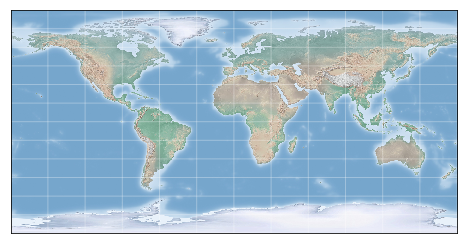

In [19]:
from mpl_toolkits.basemap import Basemap

from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')
        
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )

draw_map(m)

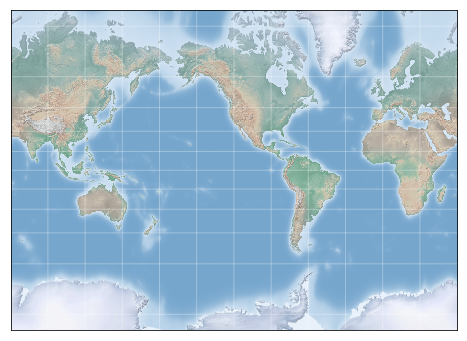

In [3]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
merc = Basemap(projection='merc', resolution=None,
            llcrnrlat=-78, urcrnrlat=78,
            llcrnrlon=60, urcrnrlon=420, )

draw_map(merc)

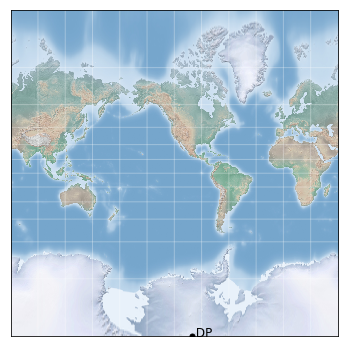

In [6]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
merc = Basemap(projection='merc', resolution=None,
            llcrnrlat=-85, urcrnrlat=85,
            llcrnrlon=60, urcrnrlon=420, )

draw_map(merc)

# Map (long, lat) to (x, y) for plotting
x, y = merc(260, -85)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' DP', fontsize=12);

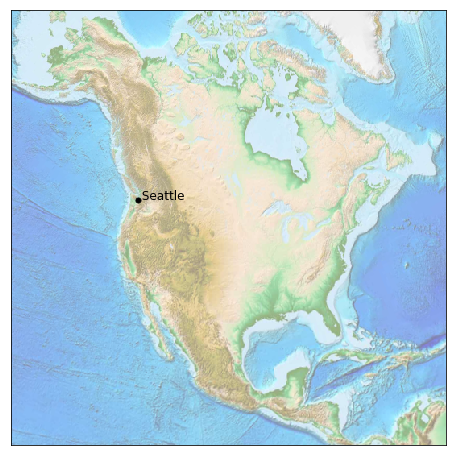

In [7]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

In [4]:
dataset = nc.Dataset('/archive/oar.gfdl.ogrp-account/CMIP6/OMIP/xanadu_mom6_20181101/OM4p125_IAF_csf_JRA55do1-3_r5_cycle4/gfdl.ncrc4-intel16f2-prod/pp/ocean_daily/ts/daily/5yr/ocean_daily.19630101-19671231.tos.nc')
#for var in dataset.variables: print(var,end=' ')
# average_DT average_T1 average_T2 nv time time_bnds tos xh yh   

tos = dataset.variables['tos']
#tos.shape (1826, 2240, 2880) 
time = dataset.variables['time']
#print(nc.num2date(time[0],time.units))
#print(nc.num2date(time[-1],time.units))
#print(nc.num2date(time[1442],time.units))
#1963-01-01 12:00:00
#1967-12-31 12:00:00
#1966-12-13 12:00:00
tos = tos[1442,:,:]

In [21]:
ocean_static_p125 = nc.Dataset('/ptmp/oar.gfdl.ogrp-account/archive/oar.gfdl.ogrp-account/CMIP6/OMIP/xanadu_mom6_20181101/OM4p125_IAF_csf_JRA55do1-3_r5_cycle4/gfdl.ncrc4-intel16f2-prod/history/ocean_static_no_mask_table.nc')
#for var in ocean_static.variables: print(var,end=' ')
# xh yh time xq yq areacello deptho hfgeou sftof Coriolis geolon geolat geolon_c geolat_c geolon_u geolat_u geolon_v geolat_v wet wet_c wet_u wet_v dxt dyt dxCu dyCu dxCv dyCv areacello_cu areacello_cv areacello_bu basin   

geolon_p125 = np.array(ocean_static_p125.variables['geolon'])
geolat_p125 = np.array(ocean_static_p125.variables['geolat'])
#print(geolon.shape,geolat.shape)
#(2240, 2880) (2240, 2880)

In [23]:
ocean_static_p25 = nc.Dataset('/ptmp/oar.gfdl.ogrp-account/archive/oar.gfdl.ogrp-account/CMIP6/OMIP/xanadu_mom6_20181101/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r_cycle4/gfdl.ncrc4-intel16f2-prod/history/19880101.nc/19880101.ocean_static_no_mask_table.nc')
#for var in ocean_static.variables: print(var,end=' ')
# xh yh time xq yq areacello deptho hfgeou sftof Coriolis geolon geolat geolon_c geolat_c geolon_u geolat_u geolon_v geolat_v wet wet_c wet_u wet_v dxt dyt dxCu dyCu dxCv dyCv areacello_cu areacello_cv areacello_bu basin   

geolon_p25 = np.array(ocean_static_p25.variables['geolon'])
geolat_p25 = np.array(ocean_static_p25.variables['geolat'])
print(geolon_p25.shape,geolat_p25.shape)
#(1080, 1440) (1080, 1440)

(1080, 1440) (1080, 1440)


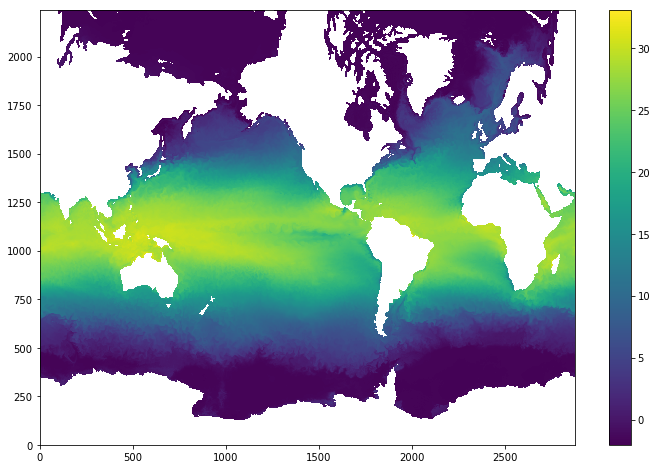

In [6]:
plt.figure(figsize=(12,8))
plt.pcolormesh(tos); plt.colorbar()

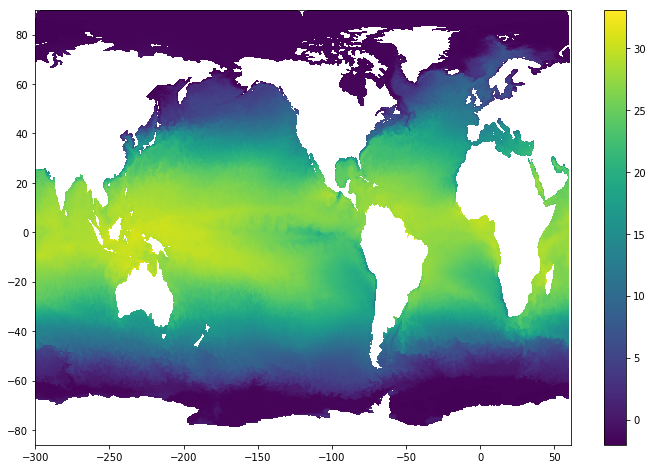

In [12]:
plt.figure(figsize=(12,8))
plt.pcolormesh(geolon_p125,geolat_p125,tos); plt.colorbar()

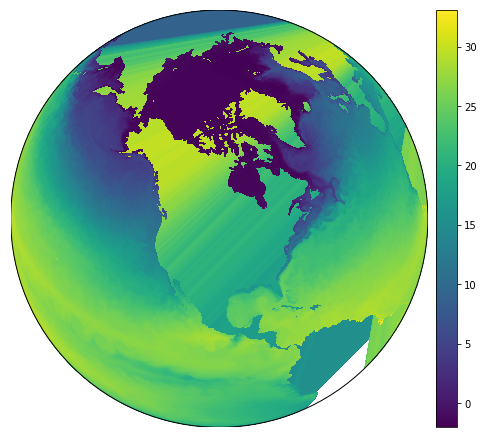

In [13]:
map1 = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
x1,y1 = map1(geolon_p125,geolat_p125)
plt.figure(figsize=(8, 8))
#map1.drawmapboundary(fill_color='0.3')
map1.pcolormesh(x1,y1,tos); map1.colorbar();

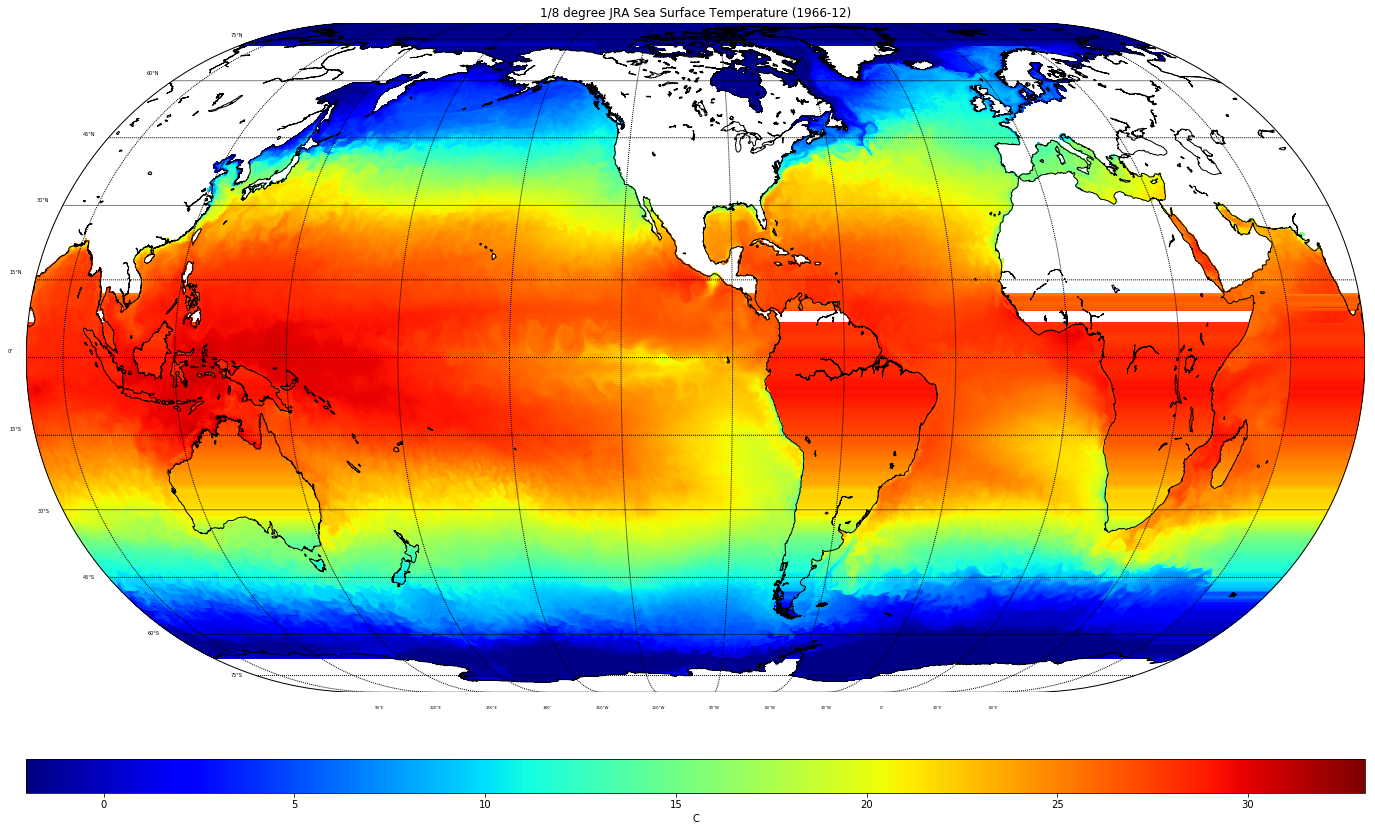

In [14]:
plt.figure(figsize=(24,16))

import matplotlib.cm as cm
map2 = Basemap(resolution='l', projection='eck4', lat_0=0, lon_0=-100)
x2,y2 = map2(geolon_p125,geolat_p125)

cs = map2.pcolor(x2,y2,np.squeeze(tos),  cmap=cm.jet)
cs.set_edgecolor('face')

# Add Grid Lines
map2.drawparallels(np.arange(-90., 90., 15.), labels=[1,0,0,0], fontsize=5)
map2.drawmeridians(np.arange(-180., 180., 30.), labels=[0,0,0,1], fontsize=4)

# Add Coastlines, States, and Country Boundaries
map2.drawcoastlines()
#map2.drawstates()
#map2.drawcountries()
# Add Colorbar
cbar = map2.colorbar(cs, location='bottom', pad="10%")
cbar.set_label('C')
cbar.ax.tick_params(labelsize=10)

# Add Title
plt.title('1/8 degree JRA Sea Surface Temperature (1966-12)')

plt.savefig('SST_TEST.pdf', format='pdf', dpi=360)

In [15]:
tos_sq = dataset.variables['tos'][0,:].squeeze()

In [16]:
tos_sq.shape

(2240, 2880)

In [25]:
dataset_sos_p125 = nc.Dataset('/archive/oar.gfdl.ogrp-account/CMIP6/OMIP/xanadu_mom6_20181101/OM4p125_IAF_csf_JRA55do1-3_r5_cycle4/gfdl.ncrc4-intel16f2-prod/pp/ocean_daily/ts/daily/5yr/ocean_daily.19630101-19671231.sos.nc')
#for var in dataset.variables: print(var,end=' ')
# average_DT average_T1 average_T2 nv time time_bnds tos xh yh   
sos_p125 = dataset_sos_p125.variables['sos']
#tos.shape (1826, 2240, 2880) 
time = dataset_sos_p125.variables['time']
sos_p125 = sos_p125[1442,:,:]

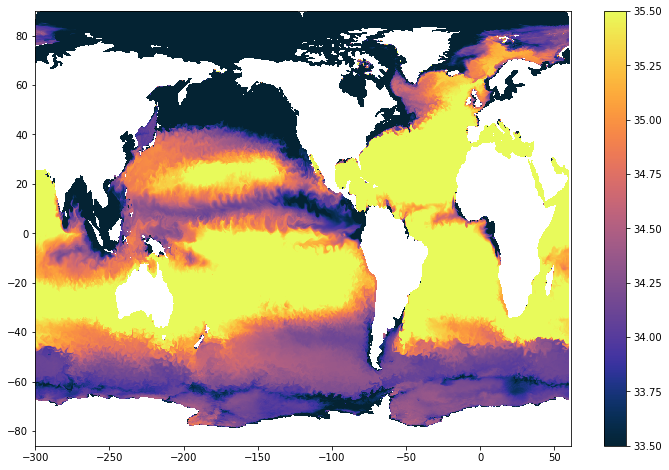

In [26]:
plt.figure(figsize=(12,8))
plt.pcolormesh(geolon,geolat,sos_p125, vmin=33.5, vmax=35.5, cmap=cmo.thermal); plt.colorbar()

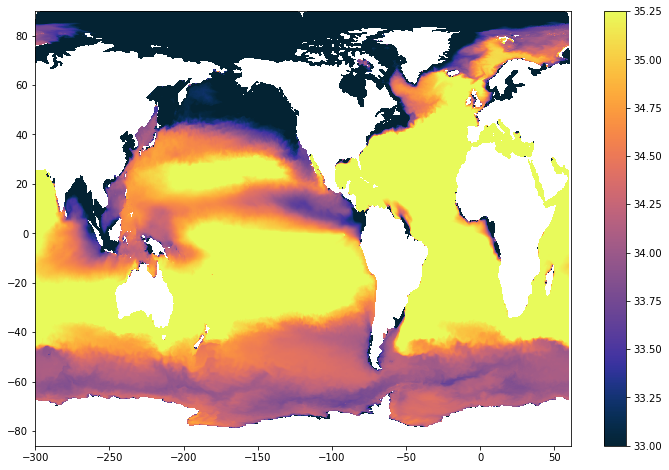

In [34]:
dataset_so_p125 = nc.Dataset('/archive/oar.gfdl.ogrp-account/CMIP6/OMIP/xanadu_mom6_20181101/OM4p125_IAF_csf_JRA55do1-3_r5_cycle4/gfdl.ncrc4-intel16f2-prod/pp/ocean_annual_z/ts/annual/20yr/ocean_annual_z.1958-1977.so.nc')
#for var in dataset_so_p125.variables: print(var,end=' ')
#average_DT average_T1 average_T2 nv so time time_bnds xh yh z_i z_l  
so_p125 = dataset_so_p125.variables['so']
#so_p125.shape #(20, 35, 2240, 2880)
time = dataset_so_p125.variables['time']
so_p125 = so_p125[10,0,:,:]
plt.figure(figsize=(12,8))
plt.pcolormesh(geolon,geolat,so_p125, vmin=33, vmax=35.25, cmap=cmo.thermal); plt.colorbar()

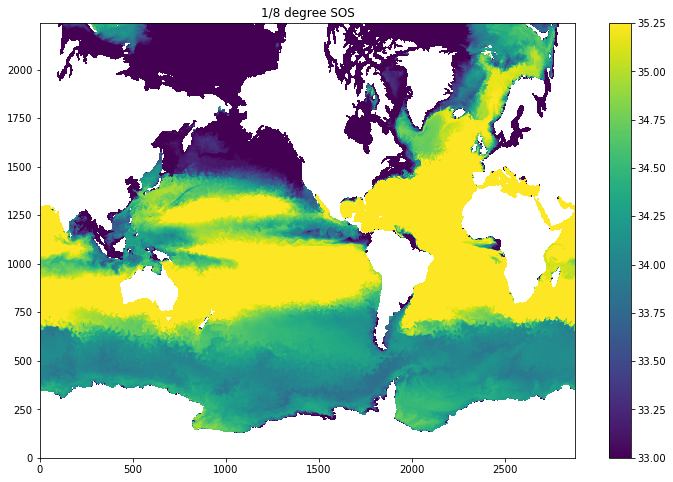

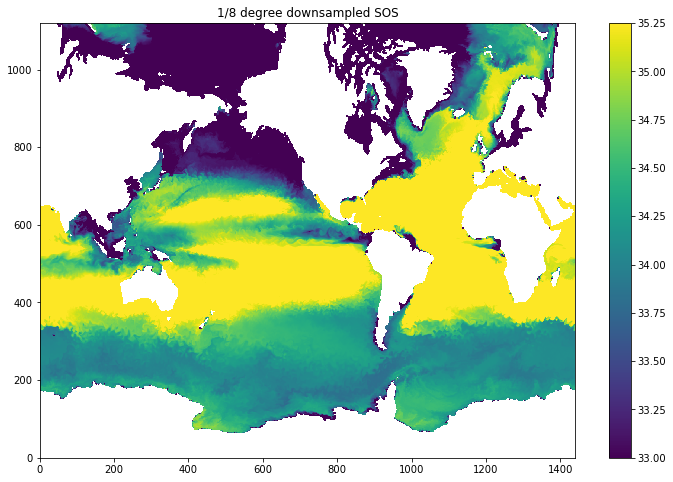

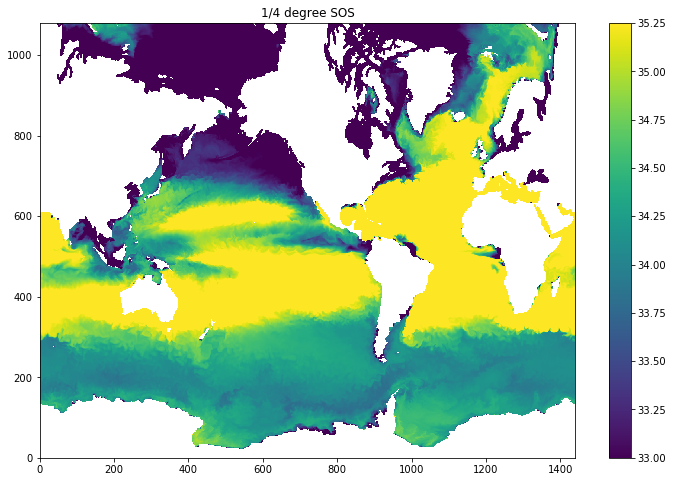

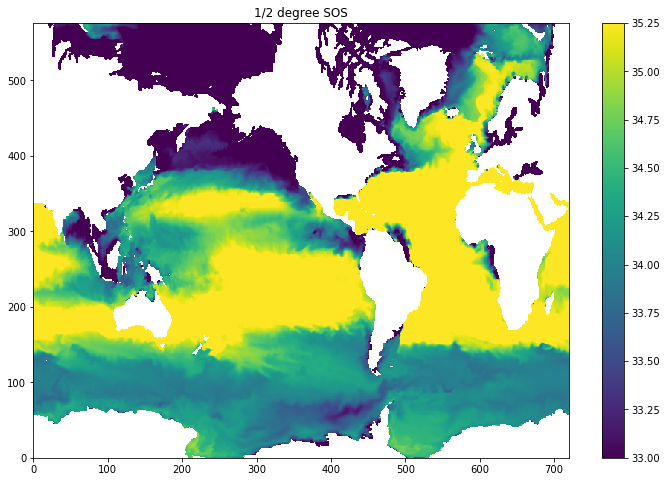

In [30]:
ocean_daily_p125 = nc.Dataset('/ptmp/oar.gfdl.ogrp-account/archive/oar.gfdl.ogrp-account/CMIP6/OMIP/xanadu_mom6_20181101/OM4p125_IAF_csf_JRA55do1-3_r5_cycle4/gfdl.ncrc4-intel16f2-prod/history/19880101.nc/19880101.ocean_daily.nc')
sos_p125 = ocean_daily_p125.variables['sos']
sos_p125 = sos_p125[150]

ocean_daily_p125_d2 = nc.Dataset('/ptmp/oar.gfdl.ogrp-account/archive/oar.gfdl.ogrp-account/CMIP6/OMIP/xanadu_mom6_20181101/OM4p125_IAF_csf_JRA55do1-3_r5_cycle4/gfdl.ncrc4-intel16f2-prod/history/19880101.nc/19880101.ocean_daily_d2.nc')
sos_p125_d2 = ocean_daily_p125_d2.variables['sos']
sos_p125_d2 = sos_p125_d2[150]

ocean_daily_p25 = nc.Dataset('/ptmp/oar.gfdl.ogrp-account/archive/oar.gfdl.ogrp-account/CMIP6/OMIP/xanadu_mom6_20181101/OM4p25_IAF_BLING_CFC_csf_JRA55do1-3_r4r_cycle4/gfdl.ncrc4-intel16f2-prod/history/19880101.nc/19880101.ocean_daily.nc')
sos_p25 = ocean_daily_p25.variables['sos']
sos_p25 = sos_p25[150]

ocean_daily_p5 = nc.Dataset('/ptmp/oar.gfdl.ogrp-account/archive/oar.gfdl.ogrp-account/CMIP6/OMIP/xanadu_mom6_20181101/OM4p5_IAF_BLING_CFC_abio_csf_mle200_JRA55do1-3_r4r_cycle4/gfdl.ncrc4-intel16f2-prod/history/19800101.nc/19800101.ocean_daily.nc')
sos_p5 = ocean_daily_p5.variables['sos']
sos_p5 = sos_p5[150]


plt.figure(figsize=(12,8))
plt.title("1/8 degree SOS")
plt.pcolormesh(sos_p125, vmin=33, vmax=35.25); plt.colorbar();

plt.figure(figsize=(12,8))
plt.title("1/8 degree downsampled SOS")
plt.pcolormesh(sos_p125_d2, vmin=33, vmax=35.25); plt.colorbar();

plt.figure(figsize=(12,8))
plt.title("1/4 degree SOS")
plt.pcolormesh(sos_p25, vmin=33, vmax=35.25); plt.colorbar();

plt.figure(figsize=(12,8))
plt.title("1/2 degree SOS")
plt.pcolormesh(sos_p5, vmin=33, vmax=35.25); plt.colorbar();

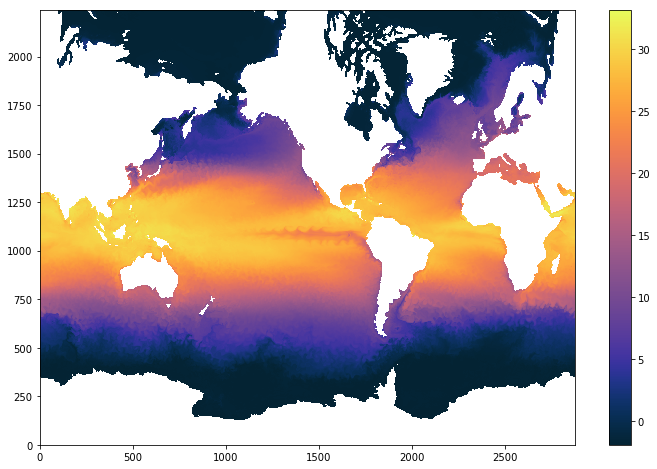

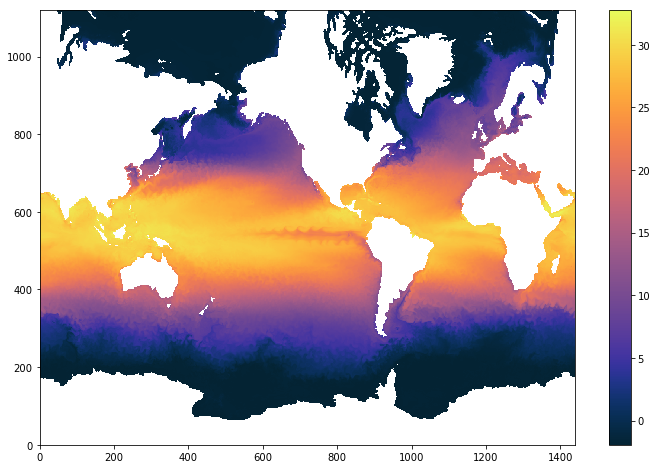

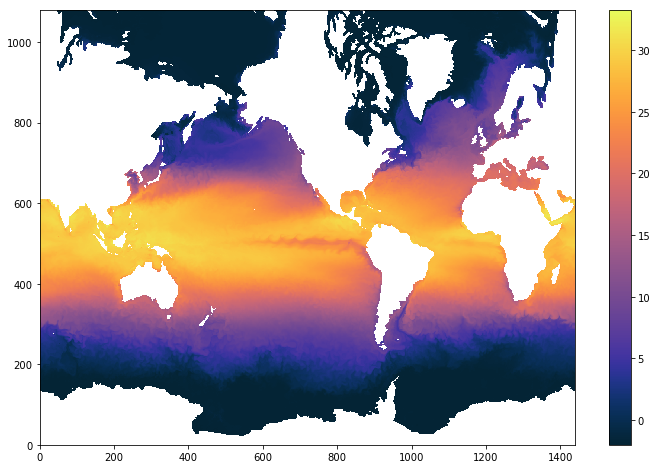

In [25]:
tos_p125 = ocean_daily_p125.variables['tos'][150,:,:]
#sos_p125 = sos_p125[150]

tos_p125_d2 = ocean_daily_p125_d2.variables['tos'][150,:,:]
#sos_p125_d2 = sos_p125_d2[150]

tos_p25 = ocean_daily_p25.variables['tos'][150,:,:]
#sos_p25 = sos_p25[150]

plt.figure(figsize=(12,8))
plt.pcolormesh(tos_p125,    cmap=cmo.thermal); plt.colorbar();

plt.figure(figsize=(12,8))
plt.pcolormesh(tos_p125_d2, cmap=cmo.thermal); plt.colorbar();

plt.figure(figsize=(12,8))
plt.pcolormesh(tos_p25,     cmap=cmo.thermal); plt.colorbar();

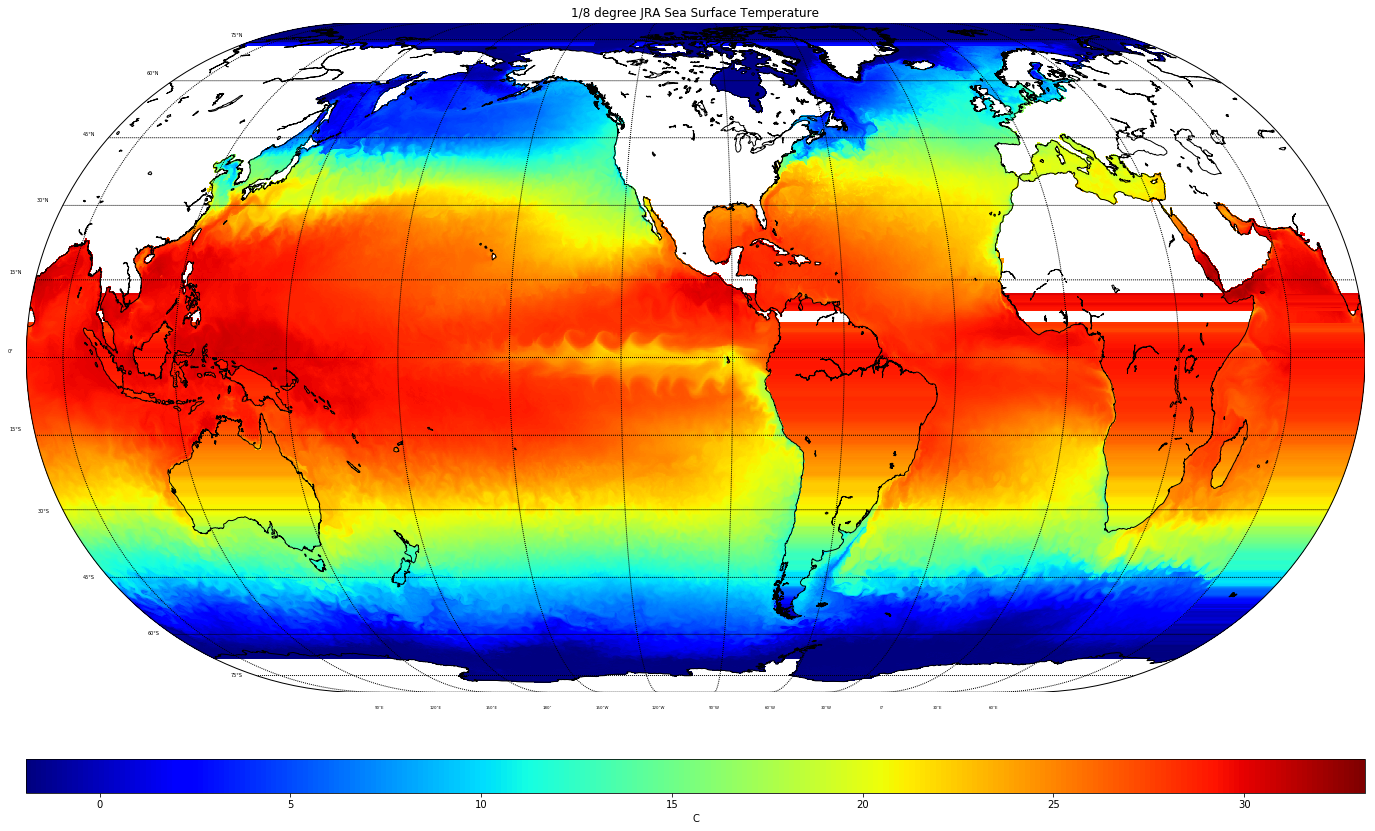

In [22]:
plt.figure(figsize=(24,16))

import matplotlib.cm as cm
map_p125 = Basemap(resolution='l', projection='eck4', lat_0=0, lon_0=-100)
x_p125,y_p125 = map_p125(geolon_p125,geolat_p125)

cs = map_p125.pcolor(x_p125,y_p125,np.squeeze(tos_p125),  cmap=cm.jet)
cs.set_edgecolor('face')

# Add Grid Lines
map_p125.drawparallels(np.arange(-90., 90., 15.), labels=[1,0,0,0], fontsize=5)
map_p125.drawmeridians(np.arange(-180., 180., 30.), labels=[0,0,0,1], fontsize=4)

# Add Coastlines, States, and Country Boundaries
map_p125.drawcoastlines()
#map2.drawstates()
#map2.drawcountries()
# Add Colorbar
cbar = map_p125.colorbar(cs, location='bottom', pad="10%")
cbar.set_label('C')
cbar.ax.tick_params(labelsize=10)

# Add Title
plt.title('1/8 degree JRA Sea Surface Temperature')

plt.savefig('SSTp125_TEST.pdf', format='pdf', dpi=360)

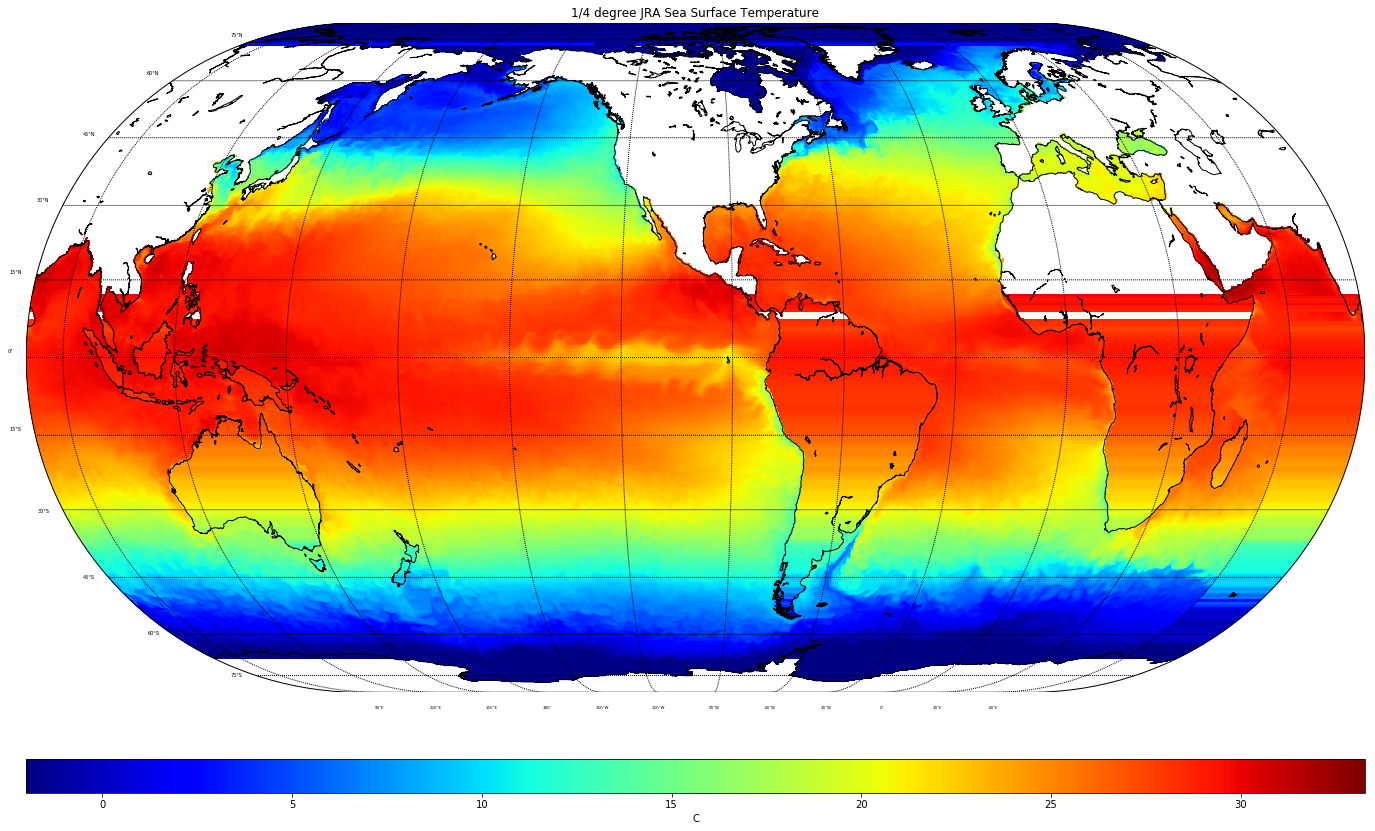

In [24]:
plt.figure(figsize=(24,16))

import matplotlib.cm as cm
map_p25 = Basemap(resolution='l', projection='eck4', lat_0=0, lon_0=-100)
x_p25,y_p25 = map_p25(geolon_p25,geolat_p25)

cs = map_p25.pcolor(x_p25,y_p25,np.squeeze(tos_p25),  cmap=cm.jet)
cs.set_edgecolor('face')

# Add Grid Lines
map_p25.drawparallels(np.arange(-90., 90., 15.), labels=[1,0,0,0], fontsize=5)
map_p25.drawmeridians(np.arange(-180., 180., 30.), labels=[0,0,0,1], fontsize=4)

# Add Coastlines, States, and Country Boundaries
map_p25.drawcoastlines()
#map2.drawstates()
#map2.drawcountries()
# Add Colorbar
cbar = map_p25.colorbar(cs, location='bottom', pad="10%")
cbar.set_label('C')
cbar.ax.tick_params(labelsize=10)

# Add Title
plt.title('1/4 degree JRA Sea Surface Temperature')

plt.savefig('SSTp25_TEST.pdf', format='pdf', dpi=360)

In [33]:
print(sos_p125_d2.shape,sos_p25.shape)

(1120, 1440) (1080, 1440)
